In [50]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Наложение и удаление шума

In [51]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

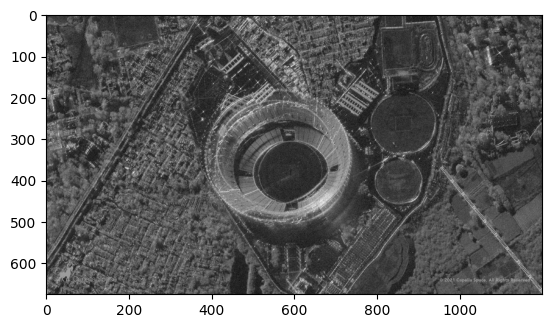

In [52]:
plt.imshow(image_gray, cmap="gray")

In [53]:
# Gaussian noise
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

array([[  0,   0,  45, ...,  23, 172,   0],
       [  0,   0,   0, ...,   0,  96,   0],
       [201,  22, 234, ...,   0, 108,   0],
       ...,
       [ 73,  50, 147, ...,   8,   0,   0],
       [  0,  95, 175, ...,   0, 209,   0],
       [  0,   6,  55, ...,   0, 100,  49]], dtype=uint8)

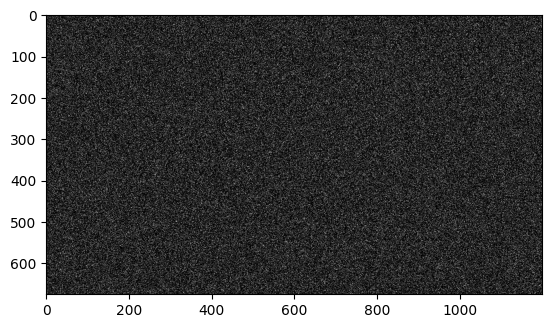

In [54]:
plt.imshow(noise_gauss, cmap="gray")

In [55]:
# Salt and pepper
noise =  np.random.randint(0, 101, size = (image_gray.shape[0], image_gray.shape[1]), dtype=int)
zeros_pixel = np.where(noise == 0)
ones_pixel = np.where(noise == 100)

In [56]:
bg_image = np.ones(image_gray.shape, np.uint8) * 128

In [57]:
bg_image[zeros_pixel] = 0
bg_image[ones_pixel] = 255

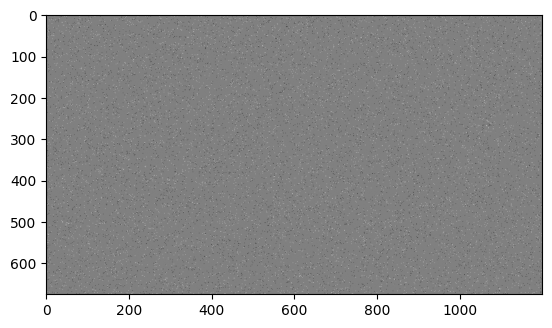

In [58]:
plt.imshow(bg_image, cmap="gray")

In [59]:
image_noise_gauss = cv2.add(image_gray,noise_gauss)

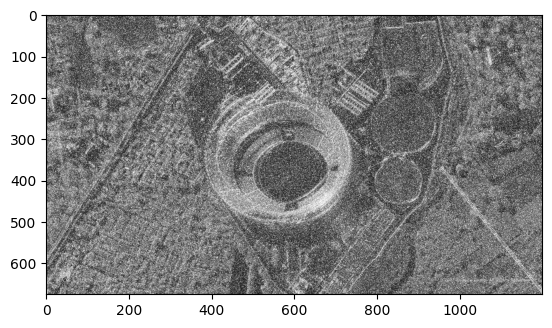

In [60]:
plt.imshow(image_noise_gauss, cmap="gray")

In [61]:
from skimage.metrics import structural_similarity, mean_squared_error
mse_gauss = mean_squared_error(image_gray, image_noise_gauss)
(ssim, diff) = structural_similarity(image_gray, image_noise_gauss, full=True)
print(mse_gauss, ssim)

4229.174369135802 0.18738390715075195


In [62]:
image_gauss_median = cv2.medianBlur(image_noise_gauss, 3)

In [63]:
mse_gauss_median = mean_squared_error(image_gray, image_gauss_median)
(ssim_gauss_median, diff) = structural_similarity(image_gray,  image_gauss_median, full=True)

In [64]:
print(mse_gauss_median, ssim_gauss_median)

1033.764675308642 0.4273461661828938


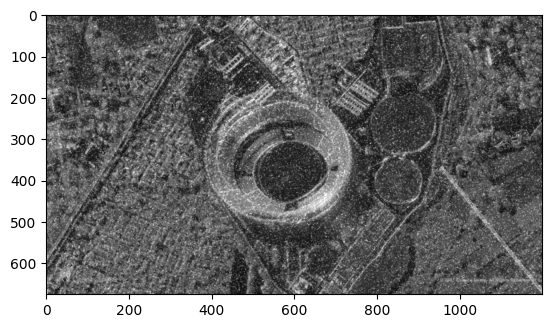

In [65]:
plt.imshow(image_gauss_median, cmap="gray")

In [66]:
import copy

image_sp = copy.deepcopy(image_gray)

image_sp[zeros_pixel] = 0
image_sp[ones_pixel] = 255

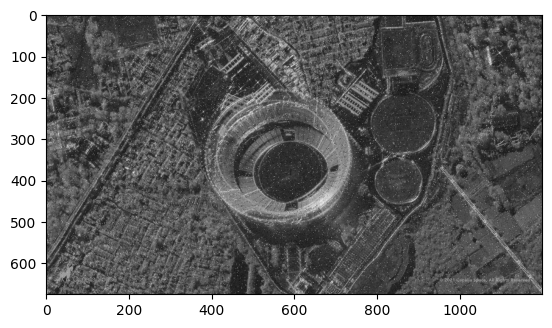

In [67]:
plt.imshow(image_sp, cmap="gray")

In [68]:
mse_sp = mean_squared_error(image_gray, image_sp)
(ssim_sp, diff) = structural_similarity(image_gray, image_sp, full=True)
print(mse_sp, ssim_sp)

382.8571802469136 0.7246580297348922


In [69]:
image_sp_median = cv2.medianBlur(image_sp, 3)

In [70]:
mse_sp_median = mean_squared_error(image_gray, image_sp_median)
(ssim_sp_median, diff) = structural_similarity(image_gray, image_sp_median, full=True)
print(mse_sp_median, ssim_sp_median)

95.70722962962962 0.816162752964616


# Другие типы фильтров

In [71]:
image_gauss_gauss = cv2.GaussianBlur(image_noise_gauss,(5,5),0)

In [72]:
image_gauss_bilat = cv2.bilateralFilter(image_noise_gauss,9,75,75)

In [73]:
image_gauss_nlm = cv2.fastNlMeansDenoising(image_noise_gauss, h = 20)

In [74]:
import math

def geom(a):
    prod = 1
    for i in range(a.shape[0]):
        prod1 = 1
        for j in range(a.shape[1]):
            prod1 *= a[i,j]
        prod1 = math.pow(prod1, 1.0/9.0)
        prod *= prod1
    return prod

def proc(img, filter):
    img_res = copy.deepcopy(img)
    for i in range(0,img.shape[0] -2):
        for j in range(0,img.shape[1] -2):
            img_res[i:i+3, j:j+3] = filter(img[i:i+3, j:j+3])
    return img_res

res = proc(image_noise_gauss, geom)


/tmp/ipython-input-3044326922.py:8: RuntimeWarning: overflow encountered in scalar multiply
  prod1 *= a[i,j]


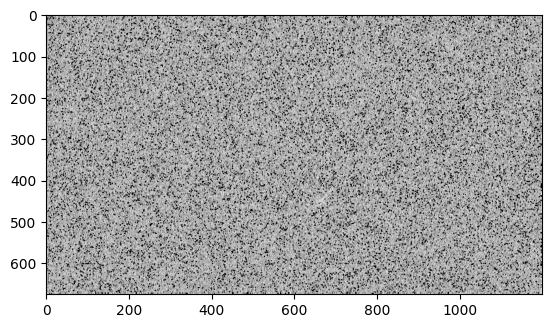

In [75]:
plt.imshow(res, cmap="gray")

In [76]:
mse_geom = mean_squared_error(image_gray, res)
(ssim_geom, diff) = structural_similarity(image_gray, res, full=True)
print(mse_geom, ssim_geom)

6552.376183950617 0.02742987937406938



# 2D свертка

In [77]:
# averaging filter
kernel_5 = np.ones((5,5),np.float32)/25
image_k5 = cv2.filter2D(image_gray,-1,kernel_5)
# blured_image = cv2.blur(img,(5,5))
image_b5 = cv2.blur(image_gray,(5,5))

In [78]:
mse_kb = mean_squared_error(image_k5, image_b5)
(ssim_kb, diff) = structural_similarity(image_k5, image_b5, full=True)
print(mse_kb, ssim_kb)

0.0 1.0


In [79]:
# Laplasian
kernel_lapl = np.array([[0,-10,0],
                        [-10,40,-10],
                        [0,-10,0]], np.float32)

In [80]:
image_lapl = cv2.filter2D(image_gray,-1,kernel_lapl)

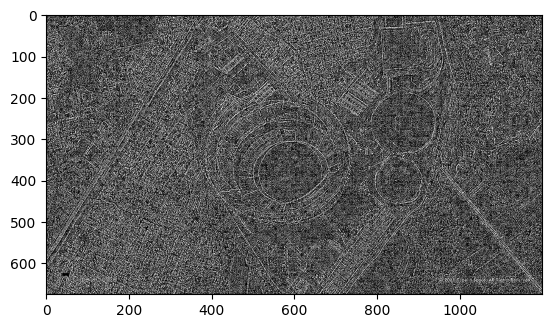

In [81]:
plt.imshow(image_lapl, cmap="gray")

In [82]:
# ДЗ 2
# Зашумить изображение при помощи шума гаусса, постоянного шума.
# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.
# Выяснить, какой фильтр показал лучший результат фильтрации шума.

## 1. Зашумить изображение при помощи шума гаусса, постоянного шума.

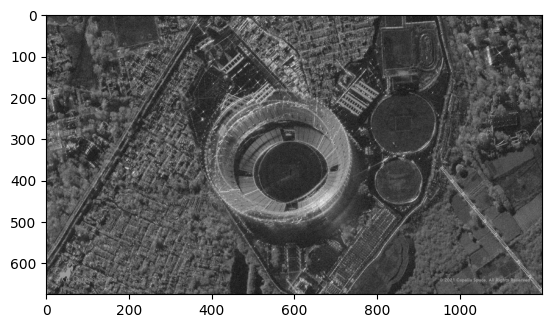

In [83]:
image = cv2.imread('sar_1.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')

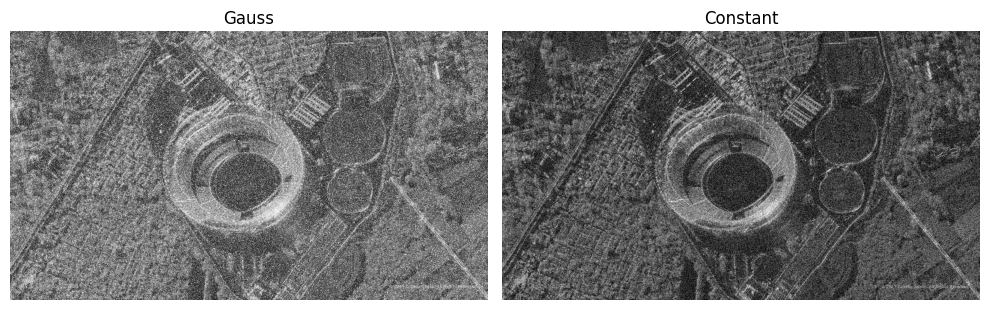

In [87]:
mean = 0
stddev = 100
noise_gauss = np.zeros(image.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)
image_noise_gauss = cv2.add(image, noise_gauss)

intensity = 70
noise_constant = np.random.uniform(-intensity, intensity, image.shape)
noise_constant = noise_constant.astype(np.int16)
image_noise_constant = image.astype(np.int16) + noise_constant
image_noise_constant = np.clip(image_noise_constant, 0, 255).astype(np.uint8)

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(image_noise_gauss, cmap='gray')
plt.title("Gauss")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(image_noise_constant, cmap='gray')
plt.title("Constant")
plt.axis('off')
plt.tight_layout()

## 2. Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.

Gauss noise; Median filter; PSNR = 19.6689; SSIM = 0.4701
Gauss noise; Gauss filter; PSNR = 15.6710; SSIM = 0.4862
Gauss noise; Bilateral filter; PSNR = 15.4826; SSIM = 0.3132
Gauss noise; NL Means filter; PSNR = 11.8629; SSIM = 0.1867
Constant noise; Median filter; PSNR = 22.5132; SSIM = 0.4461
Constant noise; Gauss filter; PSNR = 24.5200; SSIM = 0.6127
Constant noise; Bilateral filter; PSNR = 23.5629; SSIM = 0.5372
Constant noise; NL Means filter; PSNR = 16.2931; SSIM = 0.2899


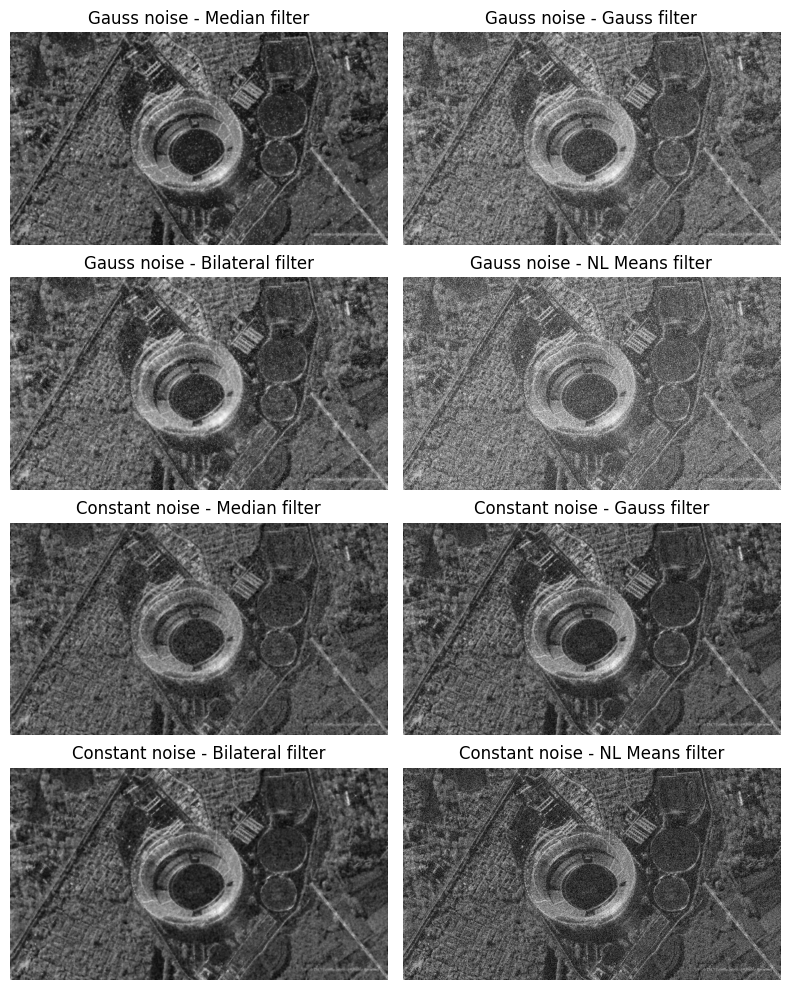

In [88]:
from skimage.metrics import structural_similarity, peak_signal_noise_ratio

filters = {
    "Median": (cv2.medianBlur, (5,)),
    "Gauss": (cv2.GaussianBlur, ((5, 5), 0)),
    "Bilateral": (cv2.bilateralFilter, (9, 75, 75)),
    "NL Means": (cv2.fastNlMeansDenoising, (None, 10, 7, 21))
}

noise_images = {
    "Gauss": image_noise_gauss,
    "Constant": image_noise_constant
}

best_psnr = {"Gauss": (None, 0), "Constant": (None, 0)}
best_ssim = {"Gauss": (None, 0), "Constant": (None, 0)}

plt.figure(figsize=(8, 10))
i = 1

for noise_name, noise_image in noise_images.items():
    for filter_name, (filter_command, filter_params) in filters.items():
        image_filtered = filter_command(noise_image, *filter_params)

        plt.subplot(4, 2, i)
        plt.imshow(image_filtered, cmap='gray')
        plt.title(f"{noise_name} noise - {filter_name} filter")
        plt.axis('off')
        i += 1

        # Метрики сравнения:
        # PSNR - пиковое отношение сигнала к шуму
        # SSIM - структурное сходство
        # PSNR считает математическую ошибку пикселей и не коррелирует с визуальным качеством сравниваемых изображений
        # SSIM ориентирован на восприятие человеком визуального качества, т.к. сравнивает структурные элементы, яркость и т.д.
        image_psnr = peak_signal_noise_ratio(image, image_filtered)
        image_ssim = structural_similarity(image, image_filtered)
        print(f"{noise_name} noise; {filter_name} filter; PSNR = {image_psnr:.4f}; SSIM = {image_ssim:.4f}")

        if image_psnr > best_psnr[noise_name][1]:
            best_psnr[noise_name] = (filter_name, image_psnr)

        if image_ssim > best_ssim[noise_name][1]:
            best_ssim[noise_name] = (filter_name, image_ssim)

plt.tight_layout()
plt.show()

## 3. Выяснить, какой фильтр показал лучший результат фильтрации шума.

In [89]:
for noise in noise_images.keys():
    print(f"{noise} noise:")
    print(f"  Best filter (by PSNR): {best_psnr[noise][0]}; PSNR = {best_psnr[noise][1]:.4f}")
    print(f"  Best filter (by SSIM): {best_ssim[noise][0]}; SSIM = {best_ssim[noise][1]:.4f}")

# Словарь фильтров и побед
filter_wins = {name: 0 for name in filters.keys()}

for noise in noise_images.keys():
    filter_wins[best_psnr[noise][0]] += 1
    filter_wins[best_ssim[noise][0]] += 1

leader_filter = max(filter_wins, key=filter_wins.get)

print("\nBest filter:")
print(f"  {leader_filter} ({filter_wins[leader_filter]} wins)")

Gauss noise:
  Best filter (by PSNR): Median; PSNR = 19.6689
  Best filter (by SSIM): Gauss; SSIM = 0.4862
Constant noise:
  Best filter (by PSNR): Gauss; PSNR = 24.5200
  Best filter (by SSIM): Gauss; SSIM = 0.6127

Best filter:
  Gauss (3 wins)
